In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential    # this for build the neural network architecture
from keras.layers import Dense , Conv2D , Flatten  # to create layers for our model 
from keras.datasets import mnist     # the dataset 
from tensorflow.keras.utils import to_categorical # to encode the data 

# Load mnist dataset

In [9]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [10]:
print(x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# get first image 

In [11]:
x_train[0]
# its array of pixels values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# get the firs image lable 

In [13]:
y_train[0]

5

# display the image 


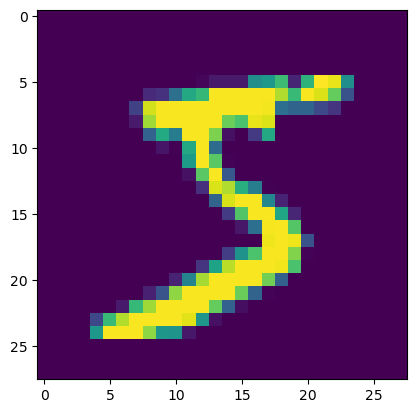

In [22]:
plt.imshow(x_train[0])

# reshape the data 
* ##   add the depth value for the image to fit the model 


In [23]:
x_train = x_train.reshape(60000 , 28 , 28 , 1)
x_test = x_test.reshape(10000 , 28 , 28 , 1)

* ## using one hot encoding 


In [24]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new lables 
print(y_train_one_hot[0])   # get the new lable for number 5 it return 1 for its position and 0 for other numbers 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Apply model

In [25]:
model = Sequential() 

# add first conv layer to model  , activation function is relu  ,input image size is 28 * 28 with depth equal to 1
model.add(Dense(64 , activation = 'relu' , input_shape = (28,28,1)))

# add second conv layer 
model.add(Dense(32 , activation = 'relu'))

# add a flatten layer to set the image into 1d array 
model.add(Flatten())

# add the last layer , 10 is the neurons number for 10 different digits , activation function is softmax 
model.add(Dense(10 , activation='softmax'))

In [26]:
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics=['accuracy'])

In [27]:
hist = model.fit(x_train , y_train_one_hot , validation_data=(x_test , y_test_one_hot) , epochs=3)

Epoch 1/3


1875/1875 [==============================] - 24s 12ms/step - loss: 0.4470 - accuracy: 0.8929 - val_loss: 0.2917 - val_accuracy: 0.9168
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3103 - accuracy: 0.9131 - val_loss: 0.2677 - val_accuracy: 0.9262
Epoch 3/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2900 - accuracy: 0.9193 - val_loss: 0.2899 - val_accuracy: 0.9216


# Visualize the model accuracy 


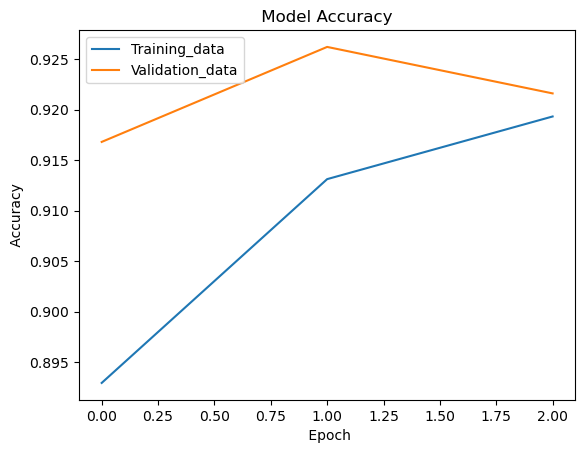

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title(" Model Accuracy ")
plt.ylabel(' Accuracy ')
plt.xlabel(' Epoch')
plt.legend(['Training_data' , 'Validation_data'] , loc = 'upper left')
plt.show()

# get the prediction  probabilites for the first 4 images 


In [29]:
predict = model.predict(x_test[:4])     
predict

1/1 [==============================] - 0s 164ms/step


array([[1.9517424e-07, 1.8513915e-13, 7.2487090e-08, 3.5151897e-04,
        3.2147184e-08, 2.9912453e-06, 6.8893112e-13, 9.9963784e-01,
        1.0550773e-07, 7.2248995e-06],
       [1.7985400e-04, 4.2502103e-07, 9.9726307e-01, 6.7834762e-06,
        2.3145353e-15, 1.6344960e-03, 9.0874033e-04, 5.4490323e-20,
        6.7099154e-06, 3.5262572e-15],
       [3.8741538e-07, 9.9398029e-01, 3.8619074e-03, 8.1748969e-04,
        3.8353668e-05, 3.1658172e-04, 8.0518548e-05, 7.2660670e-04,
        1.6232047e-04, 1.5581418e-05],
       [9.9998081e-01, 5.9135761e-14, 1.3198210e-06, 5.4515791e-08,
        7.2109749e-09, 8.4374296e-06, 7.5138228e-06, 9.4831330e-07,
        1.3084644e-07, 8.1603037e-07]], dtype=float32)

In [33]:
# simplify the predictions as a number lable 
print(np.argmax(predict , axis=1))    # this give us the max value , axis = 1 for the horizontal line 

# print the actual lables 
print(y_test[:4])

[7 2 1 0]
[7 2 1 0 4]


# display the first 4 images 


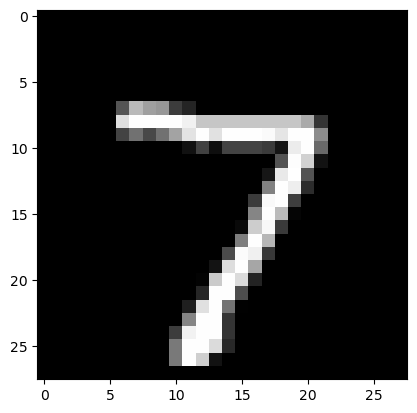

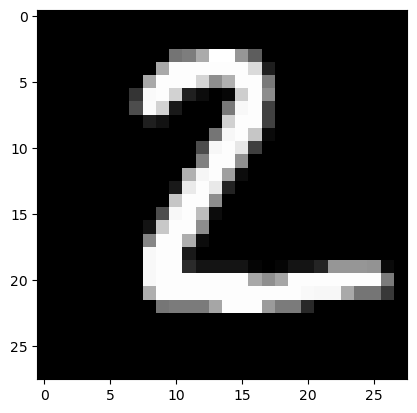

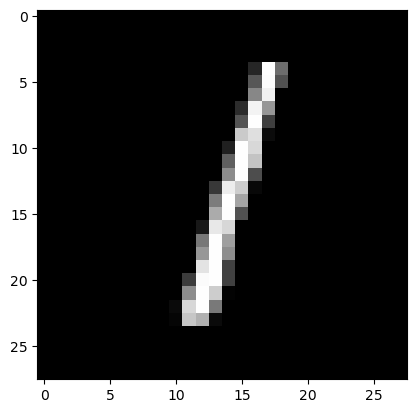

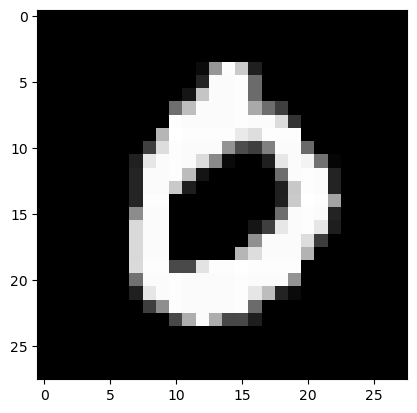

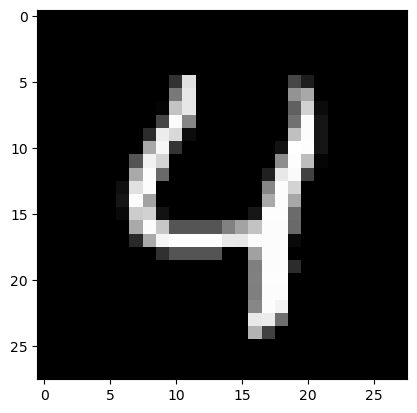

In [34]:
for i in range(0 , 4 ):
    image = x_test[i]  # get the image 
    image = np.array(image , dtype = 'float')    # convert it to array of pixels 
    pixels = image.reshape((28,28))            # reshape the image
    plt.imshow(pixels , cmap='gray')           # plot the image with black background 
    plt.show()

# Model Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 64)        128       
                                                                 
 dense_1 (Dense)             (None, 28, 28, 32)        2080      
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                250890    
                                                                 
Total params: 253098 (988.66 KB)
Trainable params: 253098 (988.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
